In [1]:
'''
Exploratory Data Analysis (EDA)
    shape,head,info,describe

Handle Data Issues
    Missing values
        Drop column if too many missing
        Impute with median/mean for numerical feature
        Fill with mode for categorical features
    Handle Outliers
        detect outliers
            normally distributed data-> z score treatment
            skewed data-> IQR based fitting(boxplot)
        handle outliers
            trimming
            capping
    Handle Categorical Variables
        ordinal encoding | label encoding
        one-hot encoding

Feature Selection
    check correlation matrix->drop unnecessary features
    


'''

'\nExploratory Data Analysis (EDA)\n    shape,head,info,describe\n\nHandle Data Issues\n    Missing values\n        Drop column if too many missing\n        Impute with median/mean for numerical feature\n        Fill with mode for categorical features\n    Handle Outliers\n        detect outliers\n            normally distributed data-> z score treatment\n            skewed data-> IQR based fitting(boxplot)\n        handle outliers\n            trimming\n            capping\n    Handle Categorical Variables\n        ordinal encoding | label encoding\n        one-hot encoding\n\nFeature Selection\n    check correlation matrix->drop unnecessary features\n    \n\n\n'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('../data/insurance.csv')

In [4]:
df.shape

(1338, 7)

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


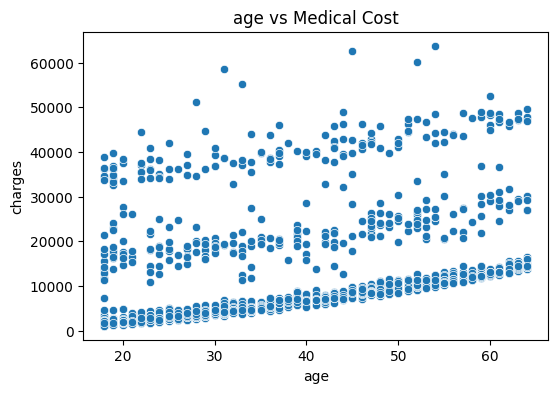

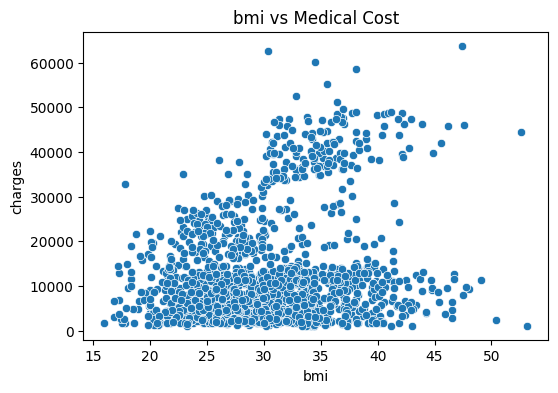

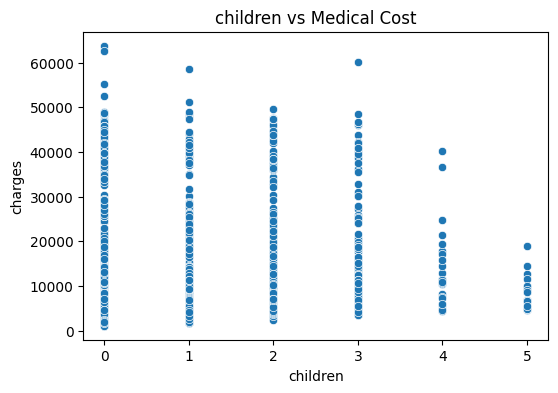

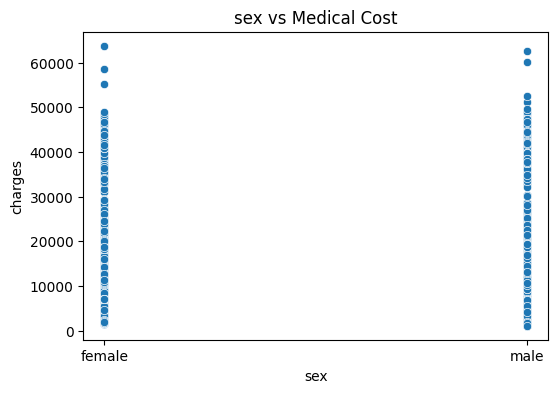

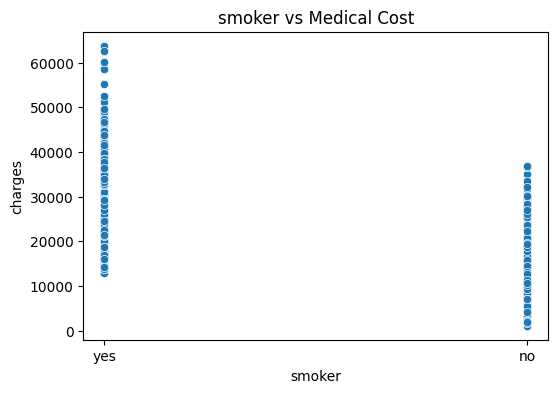

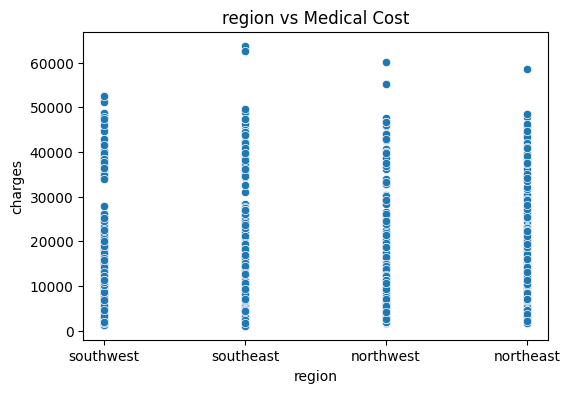

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select features to check for nonlinearity
features = ['age', 'bmi', 'children','sex', 'smoker', 'region']  # You can add more

for feature in features:
    plt.figure(figsize=(6,4))
    sns.scatterplot(x=df[feature], y=df['charges'])
    plt.title(f"{feature} vs Medical Cost")
    plt.show()


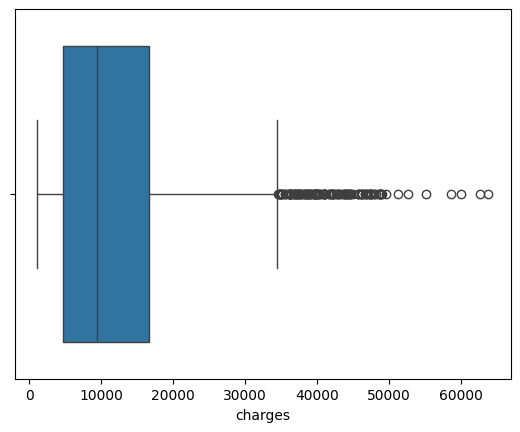

In [8]:
sns.boxplot(x=df["charges"])
plt.show()

In [9]:
df_new=df.copy()
df_new["charges_log"] = np.log1p(df["charges"])  # log(1 + x) to avoid log(0)

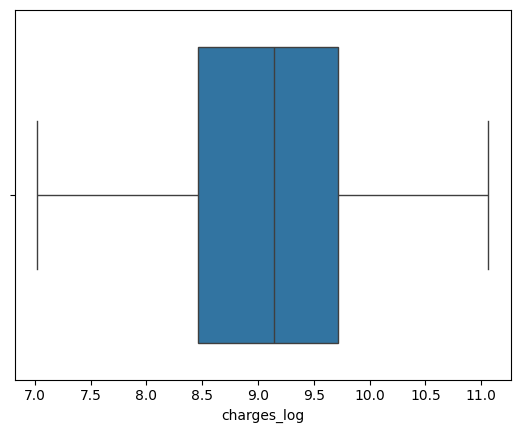

In [10]:
sns.boxplot(x=df_new["charges_log"])
plt.show()

<Axes: xlabel='charges', ylabel='Count'>

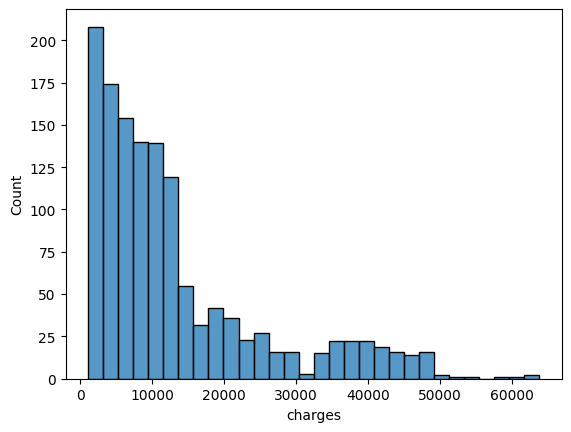

In [11]:
sns.histplot(df["charges"])

In [12]:
print(df["charges"].skew())

1.5158796580240388


In [13]:
print(df_new["charges_log"].skew())  # Check new skewness

-0.08981728740026824


<Axes: xlabel='charges_log', ylabel='Count'>

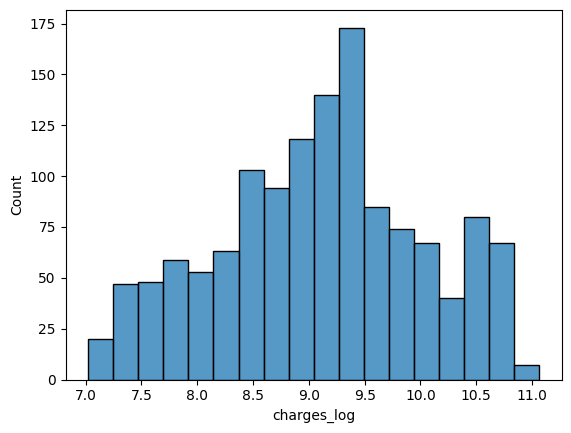

In [14]:
sns.histplot(df_new["charges_log"])

In [15]:
df_new=df_new.drop("charges",axis=1)
df_new

,age,sex,bmi,children,smoker,region,charges_log
0,19,female,27.900,0,yes,southwest,9.734236
1,18,male,33.770,1,no,southeast,7.453882
2,28,male,33.000,3,no,southeast,8.400763
3,33,male,22.705,0,no,northwest,9.998137
4,32,male,28.880,0,no,northwest,8.260455
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,9.268755
1334,18,female,31.920,0,no,northeast,7.699381
1335,18,female,36.850,0,no,southeast,7.396847
1336,21,female,25.800,0,no,southwest,7.605365


In [16]:
df_new = pd.get_dummies(df_new, columns=["sex", "smoker", "region"], drop_first=True)
df_new

,age,bmi,children,charges_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,False,True,False,False,True
1,18,33.770,1,7.453882,True,False,False,True,False
2,28,33.000,3,8.400763,True,False,False,True,False
3,33,22.705,0,9.998137,True,False,True,False,False
4,32,28.880,0,8.260455,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268755,True,False,True,False,False
1334,18,31.920,0,7.699381,False,False,False,False,False
1335,18,36.850,0,7.396847,False,False,False,True,False
1336,21,25.800,0,7.605365,False,False,False,False,True


In [17]:
df.shape

(1338, 7)

In [18]:
df_new.shape

(1338, 9)

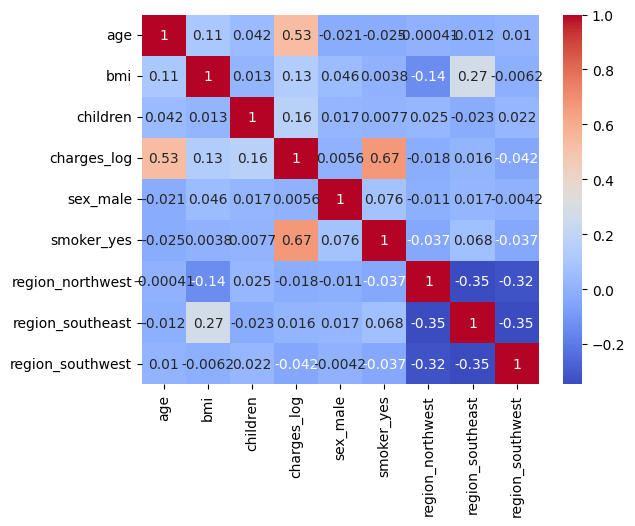

In [19]:
corr_matrix = df_new.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()


In [20]:
df_new

,age,bmi,children,charges_log,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,9.734236,False,True,False,False,True
1,18,33.770,1,7.453882,True,False,False,True,False
2,28,33.000,3,8.400763,True,False,False,True,False
3,33,22.705,0,9.998137,True,False,True,False,False
4,32,28.880,0,8.260455,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,9.268755,True,False,True,False,False
1334,18,31.920,0,7.699381,False,False,False,False,False
1335,18,36.850,0,7.396847,False,False,False,True,False
1336,21,25.800,0,7.605365,False,False,False,False,True


In [21]:
df_new = df_new[["age","bmi","smoker_yes","charges_log"]]
df_new

,age,bmi,smoker_yes,charges_log
0,19,27.900,True,9.734236
1,18,33.770,False,7.453882
2,28,33.000,False,8.400763
3,33,22.705,False,9.998137
4,32,28.880,False,8.260455
...,...,...,...,...
1333,50,30.970,False,9.268755
1334,18,31.920,False,7.699381
1335,18,36.850,False,7.396847
1336,21,25.800,False,7.605365


In [22]:
df_new.to_csv("../data/clean_data.csv", index=False)

In [23]:
x= df_new[["age","bmi","smoker_yes"]]
y= df_new[["charges_log"]]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

In [27]:
scaler.fit(x_train)

StandardScaler()

In [28]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [29]:
# # Convert scaled arrays back to DataFrame with original column names
# x_train_scaled_df = pd.DataFrame(x_train_scaled, columns=x_train.columns)
# x_test_scaled_df = pd.DataFrame(x_test_scaled, columns=x_test.columns)

# # View first few rows
# print(x_train_scaled_df.head())
# print(x_test_scaled_df.head())

In [30]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train_scaled, y_train)


LinearRegression()

In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.298166547393894
R² Score: 0.6569410802269051


C:\Users\debta\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


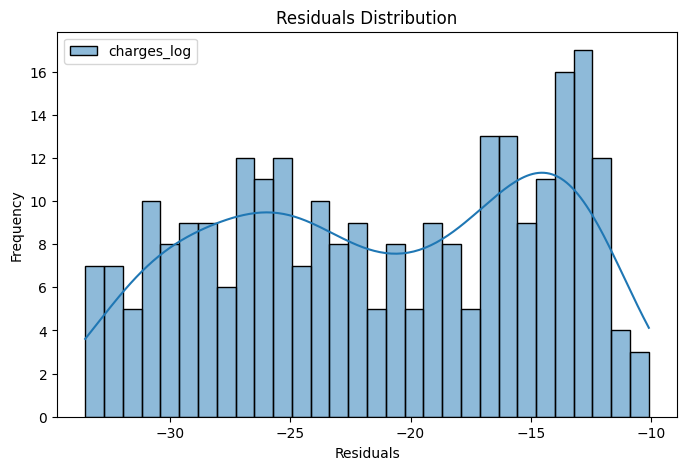

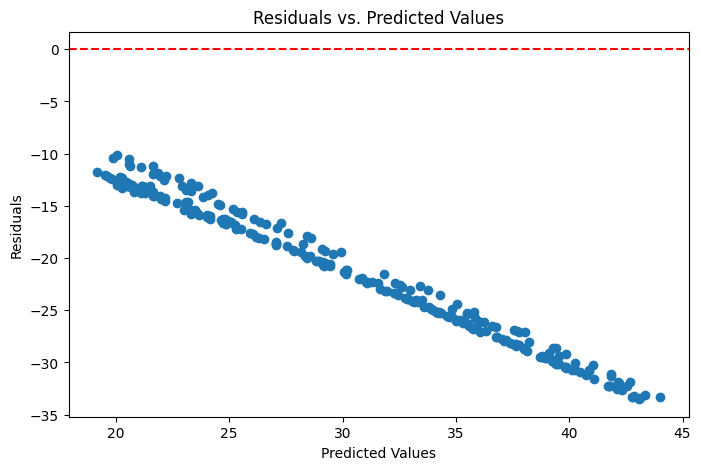

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Predictions
y_pred = model.predict(x_test)

# Residuals
residuals = y_test - y_pred

# Histogram of residuals
plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

# Scatter plot of residuals
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()


In [38]:
# Save the trained model and scaler
import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('../models', exist_ok=True)

# Save both model and scaler
joblib.dump(model, '../models/medical_cost_model.joblib')
joblib.dump(scaler, '../models/scaler.joblib')

# Verify the files were saved correctly
print(f"Model file size: {os.path.getsize('../models/medical_cost_model.joblib')} bytes")
print(f"Scaler file size: {os.path.getsize('../models/scaler.joblib')} bytes")

Model file size: 607 bytes
Scaler file size: 1007 bytes
